# House Prices Prediction

# i. Introduction  
**Name:** Jenny Aurelia Tanaya  

**Problem statement:**  
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

This dataset have 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa.
 
**Objective:**  
This project is created to predict the final price of each home.
The models used for this prediction are: `LinearRegression()` and `RandomForestRegressor()` with the `RMSE` metric.

# ii. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
import phik
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Import model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Import evaluation model
from sklearn.metrics import mean_squared_error

# Import for saving model
import pickle

# Ignore warning
import warnings
warnings.filterwarnings('ignore')


# iii. Data Loading

In [2]:
# Read Data Source (CSV file) into a DataFrame
df_ori = pd.read_csv('train.csv')

# Duplicate data
df = df_ori.copy()

# Show top 5 data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Checking data-1
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Checking data -2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Some missing values are detected especially in the columns 'LotFrontage' and 'Alley'.  
Let's do a further check:

In [5]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Assuming df is your DataFrame
missing_values = df.isnull().sum()

# Convert the Series to a DataFrame and print as string
print(missing_values.to_frame(name='MissingValues').to_string())

               MissingValues
Id                         0
MSSubClass                 0
MSZoning                   0
LotFrontage              259
LotArea                    0
Street                     0
Alley                   1369
LotShape                   0
LandContour                0
Utilities                  0
LotConfig                  0
LandSlope                  0
Neighborhood               0
Condition1                 0
Condition2                 0
BldgType                   0
HouseStyle                 0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
RoofStyle                  0
RoofMatl                   0
Exterior1st                0
Exterior2nd                0
MasVnrType               872
MasVnrArea                 8
ExterQual                  0
ExterCond                  0
Foundation                 0
BsmtQual                  37
BsmtCond                  37
BsmtExposure              38
BsmtFinType1  

Missing values are detected and will be handled later on.

Check for data duplicates

In [6]:
# Check data duplicate
df.duplicated().sum()

0

No duplicates found.

# iv. Exploratory Data Analysis

##### Objective 1: Understand the distribution of Sale Prices

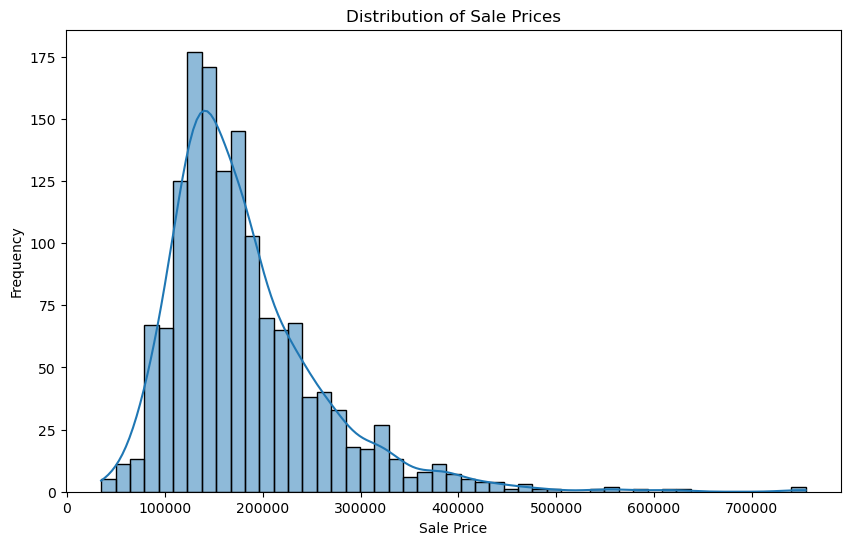

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [7]:
def sale_price_distribution(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['SalePrice'], kde=True)
    plt.title('Distribution of Sale Prices')
    plt.xlabel('Sale Price')
    plt.ylabel('Frequency')
    plt.show()
    
    print(data['SalePrice'].describe())
    print("\nSkewness:", data['SalePrice'].skew())
    print("Kurtosis:", data['SalePrice'].kurtosis())

sale_price_distribution(df)

* By looking at the standard deviation of sale prices, we can see that it varies from the mean by about $79,442 on average. This indicates a relatively high variability in house prices. This could be due to various factors like location, house size, quality, and amenities. This diversity implies that the market caters to different segments, from low-end to high-end properties.

* The skewness value indicates the asymmetry of the distribution of sale prices. There are more houses with sale prices below the mean, and a few houses with very high sale prices are pulling the distribution tail to the right. The median ($163,000) being lower than the mean ($180,921) also supports this observation.

* High kurtosis indicates that there are more extreme values or outliers in the data. These outliers could be influencing the mean and standard deviation.

Marketing strategies can be tailored to different segments. For example, lower-priced properties can be targeted towards first-time homebuyers or budget-conscious buyers, while higher-priced properties can be marketed to affluent buyers looking for luxury homes.

##### Objective 2: Examine relationships between Features and Sale Price

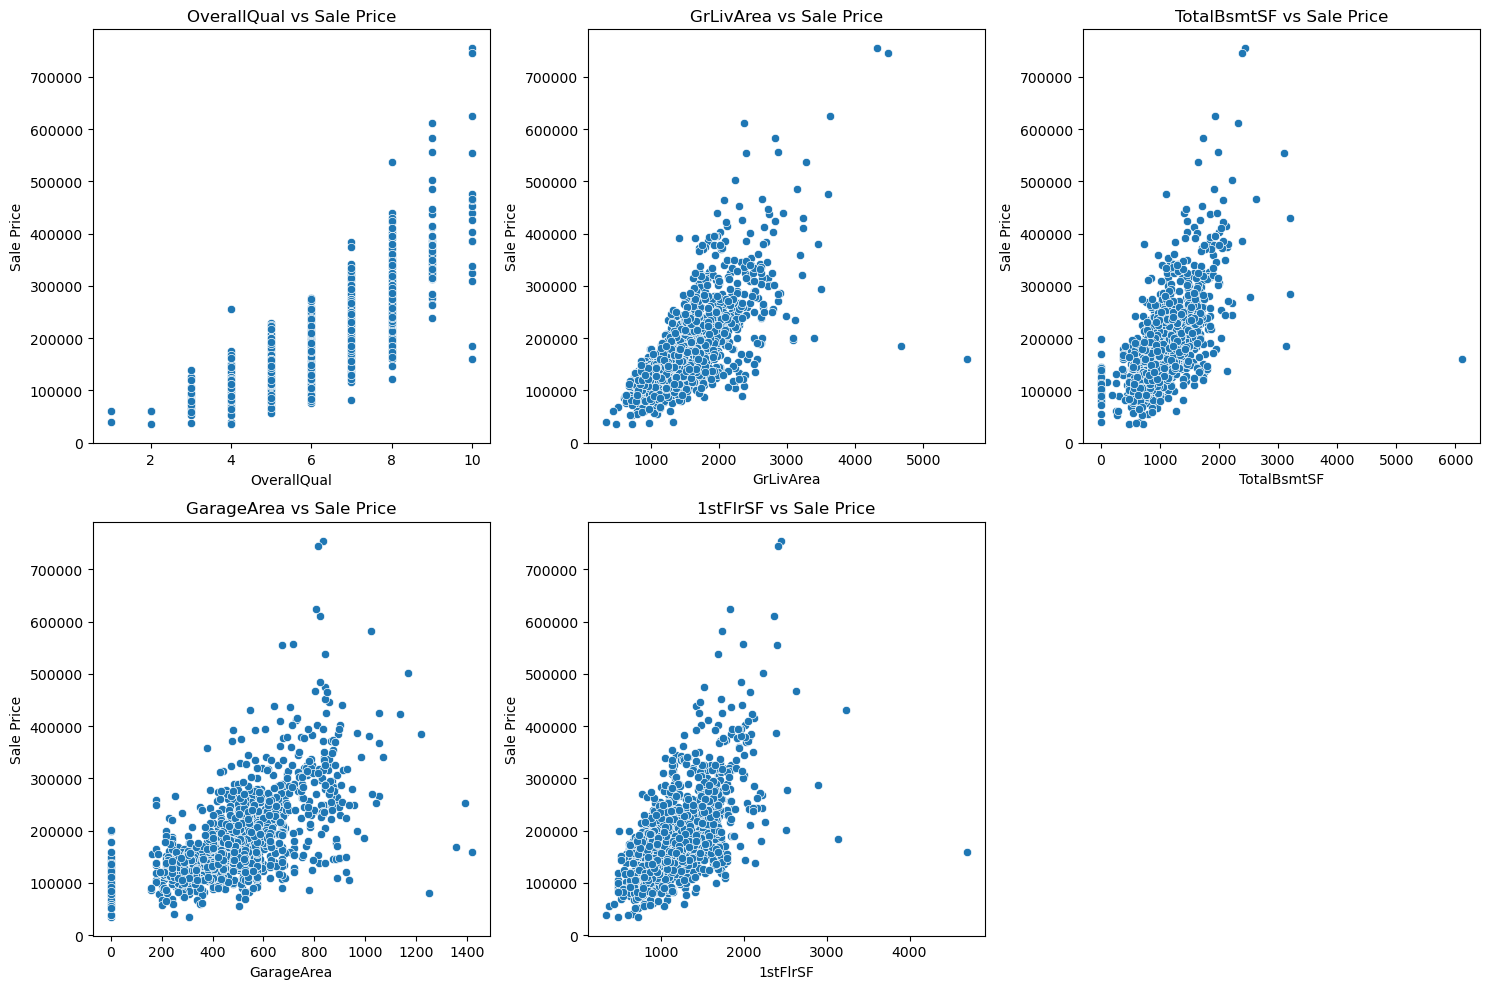

In [8]:
# Define home features to plot against sale price
home_features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF']

# Create subplots for each home feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(home_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df, x=feature, y='SalePrice')
    plt.title(f'{feature} vs Sale Price')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()


* Overall Quality vs. Sale Price: As the overall quality of a home increases, there tends to be a corresponding increase in the sale price. This indicates that buyers are willing to pay more for higher-quality homes.


* There appears to be a positive correlation between the above-ground living area (GrLivArea), the size of the basement area, the size of the garage area, and the size of the first floor area with its sale price.  

This means that larger home areas tend to command higher prices in the market. This insight suggests that buyers place significant value on the amount of living space available in a home. Sellers may consider highlighting the spaciousness of their property as a selling point.

##### Objective 3: Assess the Impact of Neighborhood and Location on Sale Price

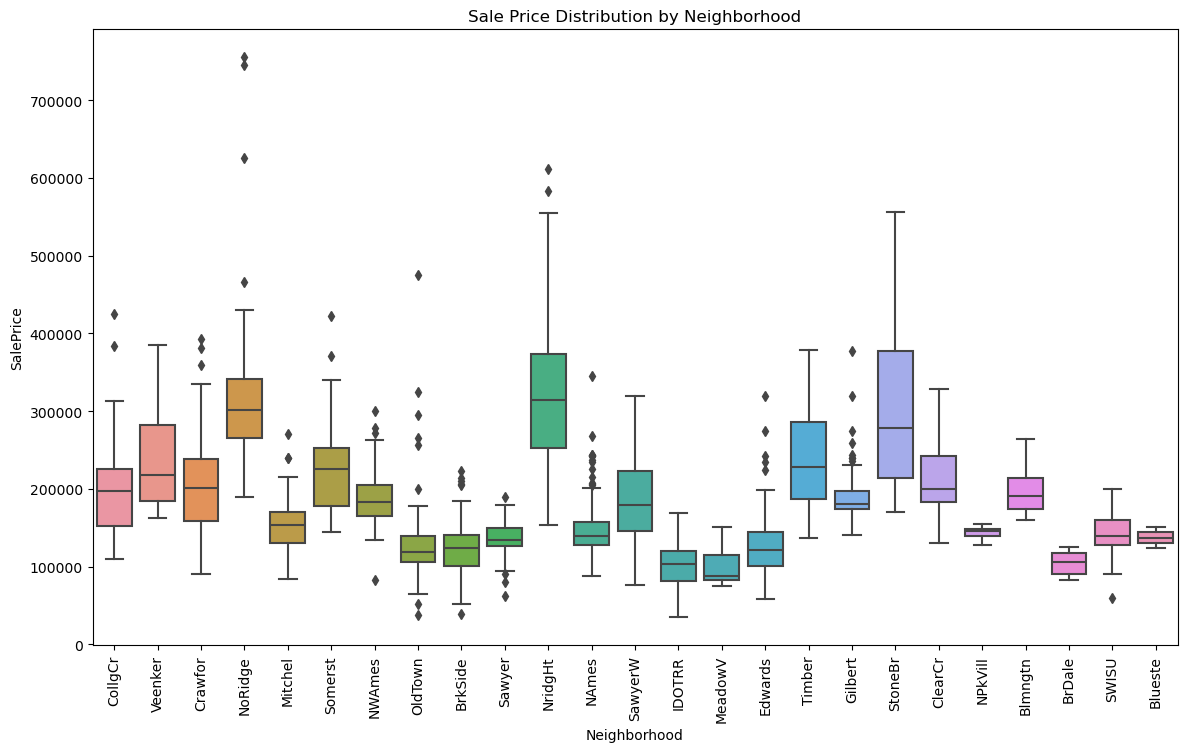

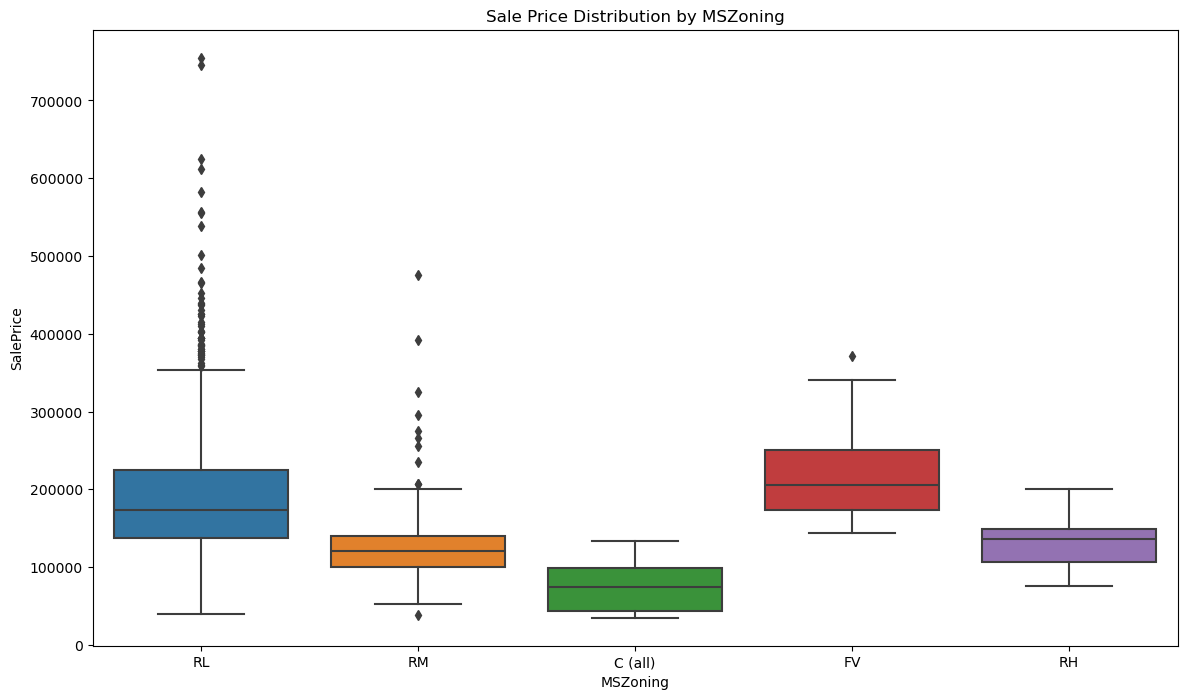

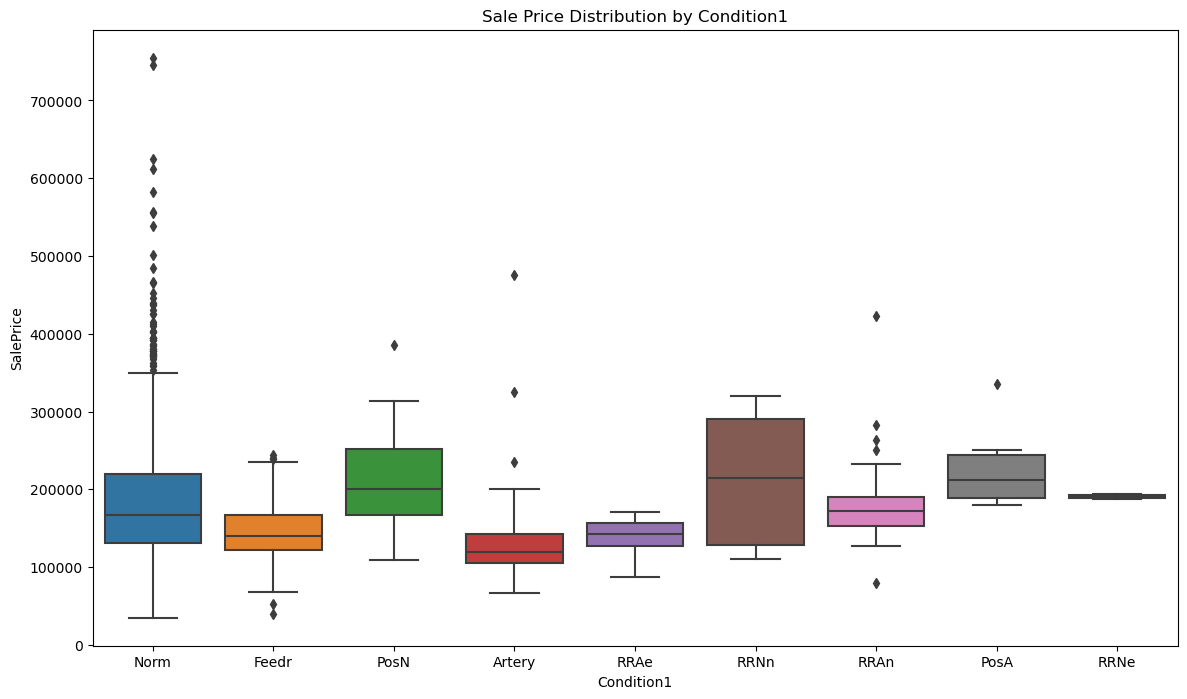

In [9]:
# Define and display the boxplot of the neigborhood impact on sale price
def neighborhood_impact(data):
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
    plt.title('Sale Price Distribution by Neighborhood')
    plt.xlabel('Neighborhood')
    plt.ylabel('SalePrice')
    plt.xticks(rotation=90)
    plt.show()

    # Display the boxplot of MSZoning by sale price
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='MSZoning', y='SalePrice', data=data)
    plt.title('Sale Price Distribution by MSZoning')
    plt.xlabel('MSZoning')
    plt.ylabel('SalePrice')
    plt.show()

    # Display the boxplot of Condition1 by sale price
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Condition1', y='SalePrice', data=data)
    plt.title('Sale Price Distribution by Condition1')
    plt.xlabel('Condition1')
    plt.ylabel('SalePrice')
    plt.show()

neighborhood_impact(df)

Box Plot: SalePrice Distribution by Neighborhood
* The SalePrice varies significantly across different neighborhoods, indicating that location is a crucial factor in determining house prices.
* Neighborhoods like NoRidge, NridgHt, and StoneBr have higher median prices compared to neighborhoods like MeadowV and BrDale.
* NridgHt and NoRidge have several high-value outliers, indicating some very expensive houses.  

Box Plot: SalePrice Distribution by MSZoning
* SalePrice varies across different zoning classifications (MSZoning), indicating that zoning type affects house prices.
FV (Floating Village Residential) has higher median prices compared to other zoning types like RM (Residential Medium Density).
* The median sale price for RL (Residential Low Density) is higher than that for RM, indicating that houses in low-density areas are generally more expensive.
Interquartile Range (IQR):
* RM and C (all) have fewer outliers, suggesting more consistency in prices within these zones.


Box Plot: SalePrice Distribution by Condition1
* The highest median can be seen in the RRNn condition implying higher variability in prices.
* The most outliers exist in the Norm condition, implying more expensive houses are sold in that particular condition.

With this analysis, real estate professionals can optimize their pricing strategies by tailoring to specific neighborhoods.  
High-end neighborhoods (NoRidge, NridgHt, StoneBr) can command higher prices, while more affordable neighborhoods can attract budget-conscious buyers.  
Understanding variability within neighborhoods and zoning types can help in risk assessment. Areas with high variability might carry more investment risk but also potential for higher returns.

##### Objective 4: Sale condition proportion

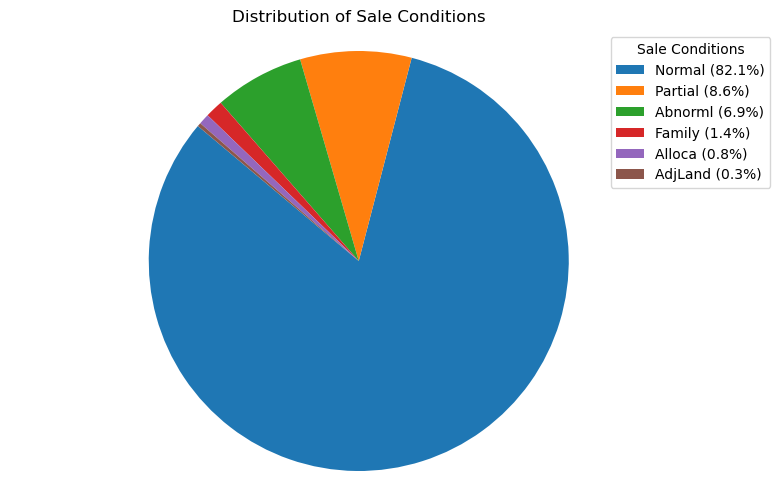

In [10]:
# Extract 'SaleCondition' column
sale_conditions = df['SaleCondition']

# Count occurrences of each sale condition
sale_condition_counts = sale_conditions.value_counts()

# Plot the pie chart
plt.figure(figsize=(9, 6))
plt.pie(sale_condition_counts, labels=None, autopct='', startangle=140)
plt.title('Distribution of Sale Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create custom legend with sale conditions and percentages
legend_labels = [f'{label} ({value:.1f}%)' for label, value in zip(sale_condition_counts.index, sale_condition_counts / sale_condition_counts.sum() * 100)]
plt.legend(legend_labels, title='Sale Conditions', loc='upper right', bbox_to_anchor=(1.1, 1))

# Show plot
plt.show()

* The largest slice in the pie chart represents the most frequent sale condition in the dataset which is Normal condition.
* Meanwhile AdjLand condition has the least data, barely existing with only 0.3%.

Analyzing the distribution of sale conditions suggests that buyers have a strong preference for properties sold under Normal condition. This condition totally makes sense, because who wants to live in a not normal condition?

This means real estate workers have to improve the other conditions or create pricing strategies accordingly to the conditions. Maybe targeted marketing campaigns can be designed to attract potential buyers interested in those conditions

##### Objective 5: Visualize and compare the distribution of house sale prices across different sale conditions

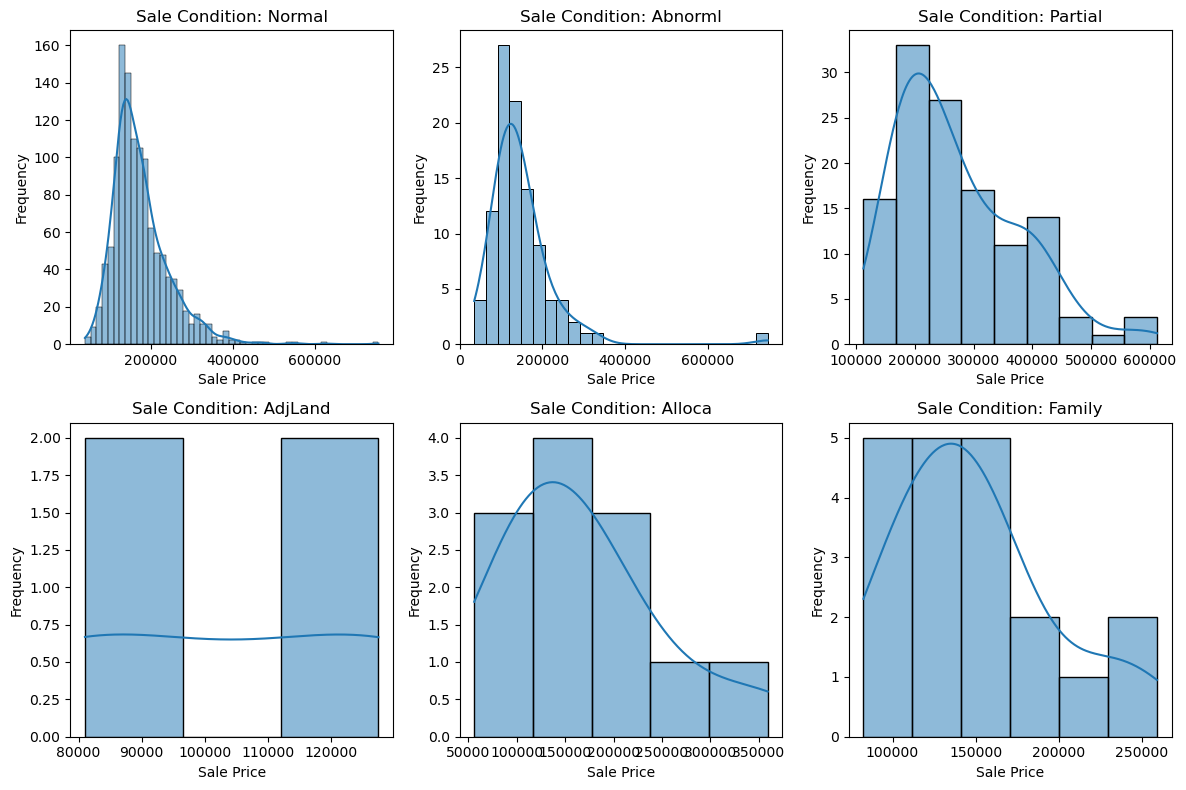

In [11]:
# Select relevant columns
data= df[['SalePrice', 'SaleCondition']]

# Define unique sale conditions
unique_conditions = df['SaleCondition'].unique()

# Create subplots for each sale condition
plt.figure(figsize=(12, 8))
for i, condition in enumerate(unique_conditions):
    plt.subplot(2, 3, i+1)  # Adjust subplot layout based on the number of unique conditions
    sns.histplot(data[df['SaleCondition'] == condition]['SalePrice'], kde=True)
    plt.title(f'Sale Condition: {condition}')
    plt.xlabel('Sale Price')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The image shows histograms of sale prices for different sale conditions. Here are some interpretations and business insights based on the visualized data:

Sale Condition: Normal:

* The majority of houses under the "Normal" sale condition are priced between $100,000 and $300,000.
* There is a noticeable skew to the right, indicating a few high-priced properties.
* This suggests that "Normal" sales are the most common and follow a more traditional pricing pattern.


Sale Condition: Abnorml (Abnormal):

* The prices for houses under the "Abnormal" sale condition are mostly concentrated below $200,000.
* There is a significant drop-off in frequency as the price increases.
* This condition might involve distressed sales, foreclosures, or other non-traditional sale scenarios, often resulting in lower prices.


Sale Condition: Partial:

* The "Partial" sale condition has a relatively wide range of prices, primarily between $100,000 and $400,000, with a peak around $200,000 to $300,000.
* This could represent new constructions or partial completions, which might be priced higher due to the newer nature of these properties.


Sale Condition: AdjLand (Adjoining Land Purchase):

* There are very few observations under this condition, and they are spread out.
* This sale condition involves purchases of land adjoining existing properties, typically lower in price, around $80,000 to $120,000.
* The low frequency indicates that such transactions are relatively rare.


Sale Condition: Alloca (Allocation):

* Prices under the "Allocation" condition are mostly below $200,000.
* This condition may involve special allocations, potentially involving unique transaction conditions or bulk sales.
* The distribution suggests these sales are not common and usually involve lower-priced properties.


Sale Condition: Family:

* The "Family" sale condition shows prices concentrated between $100,000 and $200,000, with a few higher-priced properties.
* This condition may involve sales within families, which might be priced more affordably due to the nature of the transaction.
* The skew to the right indicates some higher-priced properties, but they are less frequent.

Properties sold under "Normal" and "Partial" conditions generally fetch higher prices. Marketing efforts could focus on emphasizing these conditions to maximize sale prices. Investors can also use the distribution patterns to identify potentially undervalued properties (e.g., "Abnorml") or to focus on high-demand segments (e.g., "Normal" and "Partial").


# v. Data Preprocessing

### Split between X (Features/Variables) and y (Target/Label)

In [12]:
# Split X and y
X = df.drop(['SalePrice'], axis=1)

y = df['SalePrice']

print(X.columns)
print(y)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Split train set and test set

In [13]:
# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70) 
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1382,1383,70,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,7,7,1920,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,0,Unf,0,596,596,GasA,Ex,Y,SBrkr,998,764,0,1762,1,0,1,1,4,1,Gd,8,Typ,0,NaN,Detchd,1989.0,Unf,2,576,TA,TA,N,36,0,221,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
672,673,20,RL,NaN,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,NaN,0.0,Gd,TA,CBlock,Gd,TA,No,ALQ,767,Unf,0,441,1208,GasA,TA,Y,SBrkr,1208,0,0,1208,1,0,1,1,3,1,TA,6,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,198,42,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1038,1039,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,6,1970,2008,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,546,546,GasA,TA,Y,SBrkr,798,546,0,1344,0,0,1,1,3,1,TA,6,Typ,1,TA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
83,84,20,RL,80.0,8892,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1960,1960,Gable,CompShg,MetalSd,MetalSd,BrkCmn,66.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1065,1065,GasA,Gd,Y,SBrkr,1065,0,0,1065,0,0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1974.0,Unf,2,461,TA,TA,Y,74,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,COD,Normal
541,542,60,RL,NaN,11000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,72.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,969,969,GasA,Ex,Y,SBrkr,997,1288,0,2285,0,0,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2000.0,Fin,3,648,TA,TA,Y,0,56,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal


In [14]:
# Check shape
print('Train-set:',X_train.shape)
print('Test-set:',X_test.shape)

Train-set: (1168, 80)
Test-set: (292, 80)


## a. Missing value handling

In [15]:
X_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      207
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: int64

Set display options to view all columns

In [16]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Assuming df is your DataFrame
missing_values = X_train.isnull().sum()

# Convert the Series to a DataFrame and print as string
print(missing_values.to_frame(name='MissingValues').to_string())

               MissingValues
Id                         0
MSSubClass                 0
MSZoning                   0
LotFrontage              207
LotArea                    0
Street                     0
Alley                   1095
LotShape                   0
LandContour                0
Utilities                  0
LotConfig                  0
LandSlope                  0
Neighborhood               0
Condition1                 0
Condition2                 0
BldgType                   0
HouseStyle                 0
OverallQual                0
OverallCond                0
YearBuilt                  0
YearRemodAdd               0
RoofStyle                  0
RoofMatl                   0
Exterior1st                0
Exterior2nd                0
MasVnrType               700
MasVnrArea                 7
ExterQual                  0
ExterCond                  0
Foundation                 0
BsmtQual                  29
BsmtCond                  29
BsmtExposure              30
BsmtFinType1  

Let's view more specifically which are the columns that have missing values

In [17]:
# Create an empty list for the missing columns
missing_columns = []

# Create for loop to specify missing value to each columns
for column, missing in missing_values.items():
    if missing > 0:
        missing_columns.append((column, missing))

# Display the list
missing_columns

[('LotFrontage', 207),
 ('Alley', 1095),
 ('MasVnrType', 700),
 ('MasVnrArea', 7),
 ('BsmtQual', 29),
 ('BsmtCond', 29),
 ('BsmtExposure', 30),
 ('BsmtFinType1', 29),
 ('BsmtFinType2', 29),
 ('Electrical', 1),
 ('FireplaceQu', 558),
 ('GarageType', 68),
 ('GarageYrBlt', 68),
 ('GarageFinish', 68),
 ('GarageQual', 68),
 ('GarageCond', 68),
 ('PoolQC', 1162),
 ('Fence', 941),
 ('MiscFeature', 1124)]

Now let's take a further look for the numerical missing values, to determine which imputation method should we use.

In [18]:
# Create an empty list to store the names of numerical columns with missing values
numerical_missing_columns = []

# Iterate through the columns and their missing values
for column, missing in missing_values.items():
    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(X_train[column].dtype):
        if missing > 0:
            numerical_missing_columns.append((column, missing))

# Display the list of numerical columns with missing values
numerical_missing_columns

[('LotFrontage', 207), ('MasVnrArea', 7), ('GarageYrBlt', 68)]

From this numerical missing value, let's further find out the data skewness, to determine which imputation method should be used  
between `mean()` or `median()`.

In [19]:
# Calculate skewness for the specified columns
skewness = X_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].skew()

# Create lists to store column names with normal and skewed distributions
normal_distribution = []
skewed_distribution = []

# Iterate through skewness values and classify columns
for column, skew in skewness.items():
    if abs(skew) <= 0.5:  # Modify the threshold directly here
        normal_distribution.append(column)
    else:
        skewed_distribution.append(column)

# Print the results
print("Columns with normal distribution:")
print(normal_distribution)
print("\nColumns with skewed distribution:")
print(skewed_distribution)

Columns with normal distribution:
[]

Columns with skewed distribution:
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


Turns out that the numerical columns are skewed, so the imputation method to be used is the `median()`.

In [21]:
# Calculate the median for each column with skewed distribution
median_values = X_train[skewed_distribution].median()

# Impute missing values with the median for each column
def impute_skewed_columns(X_train, X_test, skewed_distribution, median_values):
    """
    Impute missing values in skewed numerical columns with the median for both X_train and X_test.
    
    Parameters:
    - X_train (DataFrame): Training dataset.
    - X_test (DataFrame): Testing dataset.
    - skewed_distribution (list): List of skewed numerical column names.
    - median_values (Series): Median values for the skewed numerical columns.
    """
    for column in skewed_distribution:
        X_train[column].fillna(median_values[column], inplace=True)
        X_test[column].fillna(median_values[column], inplace=True)

# Call the function to impute missing values for both X_train and X_test
impute_skewed_columns(X_train, X_test, skewed_distribution, median_values)

print(X_train['LotFrontage'].isnull().sum())
print(X_train['MasVnrArea'].isnull().sum())
print(X_train['GarageYrBlt'].isnull().sum())

0
0
0


Now for the categorical columns will be handled with `mode()` imputation method.

In [22]:
# Identify categorical columns among the missing values
categorical_missing_columns = X.select_dtypes(include=['object']).columns

# Impute missing values with mode for each categorical column
for column in categorical_missing_columns:
    mode_value = X[column].mode()[0]  # Calculate mode
    X[column].fillna(mode_value, inplace=True)

# Display the updated DataFrame
print(X_train.isnull().sum())


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


In [24]:
X_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [25]:
y_train.isnull().sum()

0

In [26]:
y_test.isnull().sum()

0

Missing values handled successfully in both X_train and X_test.

## b. Outliers Handling

In [27]:
# Detect categorical colums
X[X.select_dtypes(include=['object']).columns]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,BrkFace,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [28]:
# Create looping to check distribution numerical dataset

num = X.select_dtypes(exclude=['object']).columns.tolist()

# Create empty list to contain/add/fill (menyimpan) column lists
normal = []
skew = []
extreme = []
for i in num:
    print(f'skewness {i}: {round(X_train[i].skew(),3)}')

    if abs(round(X_train[i].skew(),3)) > 1: 
        extreme.append(i)
    elif abs(round(X_train[i].skew(),3)) > 0.5:
        skew.append(i)
    else:
        normal.append(i)

print(f'normal distribution: {normal}.') 
print('skew distribution:',skew, '.') 
print(f'extreme skew distribution:{extreme}.')

skewness Id: -0.011
skewness MSSubClass: 1.396
skewness LotFrontage: 1.94
skewness LotArea: 11.362
skewness OverallQual: 0.184
skewness OverallCond: 0.77
skewness YearBuilt: -0.653
skewness YearRemodAdd: -0.497
skewness MasVnrArea: 2.757
skewness BsmtFinSF1: 0.814
skewness BsmtFinSF2: 4.413
skewness BsmtUnfSF: 0.927
skewness TotalBsmtSF: 0.554
skewness 1stFlrSF: 1.024
skewness 2ndFlrSF: 0.781
skewness LowQualFinSF: 8.422
skewness GrLivArea: 1.19
skewness BsmtFullBath: 0.597
skewness BsmtHalfBath: 4.222
skewness FullBath: 0.05
skewness HalfBath: 0.654
skewness BedroomAbvGr: -0.062
skewness KitchenAbvGr: 4.494
skewness TotRmsAbvGrd: 0.554
skewness Fireplaces: 0.636
skewness GarageYrBlt: -0.722
skewness GarageCars: -0.365
skewness GarageArea: 0.119
skewness WoodDeckSF: 1.506
skewness OpenPorchSF: 2.444
skewness EnclosedPorch: 3.116
skewness 3SsnPorch: 9.625
skewness ScreenPorch: 4.024
skewness PoolArea: 14.258
skewness MiscVal: 23.712
skewness MoSold: 0.229
skewness YrSold: 0.07
normal di

Based on the results above, the distributed columns are:  
1. Normal (-0.5 to 0.5): ['Id', 'OverallQual', 'YearRemodAdd', 'FullBath', 'BedroomAbvGr', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold'].

2. Moderately Skew (-0.5 to-1 atau 0.5 to 1): ['OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt'].

3. Extreme Skew (> 1 or < -1) : ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'].

### Outlier checking for each distribution type

### Normal check

In [29]:
# Create function for the normal distribution
def calculate_normal_outliers(df, variable):
 
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()
        
    outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
    outliers_percentage = len(outliers) / len(df) * 100
    
    print(f'Outlier {variable} : {len(outliers)}')
    print(f'% Outlier {variable} : {round(outliers_percentage,2)}%')

In [30]:
# Using loop to call normal function
for i in normal:
    calculate_normal_outliers(X_train,i)
    print('')

Outlier Id : 0
% Outlier Id : 0.0%

Outlier OverallQual : 3
% Outlier OverallQual : 0.26%

Outlier YearRemodAdd : 0
% Outlier YearRemodAdd : 0.0%

Outlier FullBath : 0
% Outlier FullBath : 0.0%

Outlier BedroomAbvGr : 10
% Outlier BedroomAbvGr : 0.86%

Outlier GarageCars : 0
% Outlier GarageCars : 0.0%

Outlier GarageArea : 5
% Outlier GarageArea : 0.43%

Outlier MoSold : 0
% Outlier MoSold : 0.0%

Outlier YrSold : 0
% Outlier YrSold : 0.0%



The features ['OverallQual', 'BedroomAbvGr', and 'GarageArea'] have small outliers and they will be trimmed.

### Skew & Extreme check

### Moderately skew check

In [31]:
# Create function for skew distributed
def calculate_skewed_outliers(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
    outliers_percentage = len(outliers) / len(df) * 100
    
    print(f'Outlier {variable} : {len(outliers)}')
    print(f'% Outlier {variable} : {round(outliers_percentage,2)}%')

In [32]:
# Using loop to call moderately skew function
for i in skew:
    calculate_skewed_outliers(X_train,i,1.5)
    print('')

Outlier OverallCond : 94
% Outlier OverallCond : 8.05%

Outlier YearBuilt : 7
% Outlier YearBuilt : 0.6%

Outlier BsmtFinSF1 : 7
% Outlier BsmtFinSF1 : 0.6%

Outlier BsmtUnfSF : 21
% Outlier BsmtUnfSF : 1.8%

Outlier TotalBsmtSF : 51
% Outlier TotalBsmtSF : 4.37%

Outlier 2ndFlrSF : 2
% Outlier 2ndFlrSF : 0.17%

Outlier BsmtFullBath : 1
% Outlier BsmtFullBath : 0.09%

Outlier HalfBath : 0
% Outlier HalfBath : 0.0%

Outlier TotRmsAbvGrd : 23
% Outlier TotRmsAbvGrd : 1.97%

Outlier Fireplaces : 3
% Outlier Fireplaces : 0.26%

Outlier GarageYrBlt : 1
% Outlier GarageYrBlt : 0.09%



The features ['YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt'] have small outliers and they will be trimmed too.  

As for the feature ['OverallCond'] it will be capped with `Winsorizer` due to its outlier being >5%. 

#### Extreme skew check

In [33]:
# Using loop to call extreme skew function
for i in extreme:
    calculate_skewed_outliers(X_train,i,3)
    print('')

Outlier MSSubClass : 0
% Outlier MSSubClass : 0.0%

Outlier LotFrontage : 12
% Outlier LotFrontage : 1.03%

Outlier LotArea : 26
% Outlier LotArea : 2.23%

Outlier MasVnrArea : 20
% Outlier MasVnrArea : 1.71%

Outlier BsmtFinSF2 : 129
% Outlier BsmtFinSF2 : 11.04%

Outlier 1stFlrSF : 3
% Outlier 1stFlrSF : 0.26%

Outlier LowQualFinSF : 23
% Outlier LowQualFinSF : 1.97%

Outlier GrLivArea : 3
% Outlier GrLivArea : 0.26%

Outlier BsmtHalfBath : 64
% Outlier BsmtHalfBath : 5.48%

Outlier KitchenAbvGr : 55
% Outlier KitchenAbvGr : 4.71%

Outlier WoodDeckSF : 2
% Outlier WoodDeckSF : 0.17%

Outlier OpenPorchSF : 16
% Outlier OpenPorchSF : 1.37%

Outlier EnclosedPorch : 172
% Outlier EnclosedPorch : 14.73%

Outlier 3SsnPorch : 22
% Outlier 3SsnPorch : 1.88%

Outlier ScreenPorch : 95
% Outlier ScreenPorch : 8.13%

Outlier PoolArea : 6
% Outlier PoolArea : 0.51%

Outlier MiscVal : 43
% Outlier MiscVal : 3.68%



The features from the extremely skewed distribution will be trimmed. They include the columns ['LotFrontage', 'LotArea', 'MasVnrArea', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'PoolArea', 'MiscVal'].  

Meanwhile, the columns ['BsmtFinSF2', 'BsmtHalfBath', 'EnclosedPorch', and 'ScreenPorch'] **WILL NOT** be capped with `Winsorizer` since their variety are too small to be capped.

Let's check for columns 'BsmtFinSF2', 'BsmtHalfBath', 'EnclosedPorch', and 'ScreenPorch'

[   0  344  682  768  290  377 1061  823  438  539   93  546  495  841
  491  215  544  294  211  177  551  645  174  480   96   81  139  472
  123  400  334  869  181  258  125  180  420  612  580  391   32  232
  375  240  468  210  712  202   80  630  182  441  311   68  627  469
  620 1029  465  486  287  499 1474  208   64  466  239  279  165 1127
  531  396  147  634  380  872   28  149  411  906  791  324  557  273
  547  500  127  354  132  352  169  184  692  219  374  106  121  306
  435  264  163  276  144  230  362 1120  661 1063 1080   35  173  108
   41 1057  336]


<Axes: >

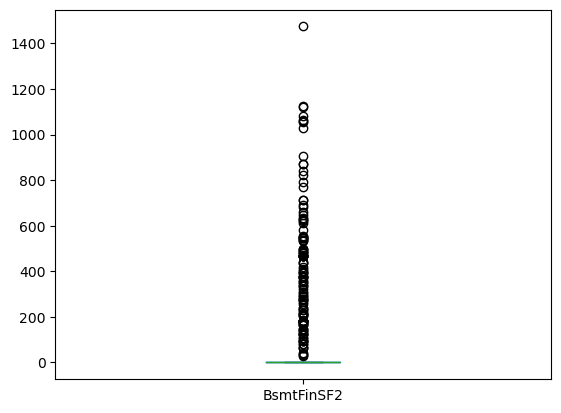

In [34]:
# Check unique values 
print(X_train['BsmtFinSF2'].unique())
# Simple visualisation of 'previous' column
X_train.BsmtFinSF2.plot(kind='box')

[0 1 2]


<Axes: >

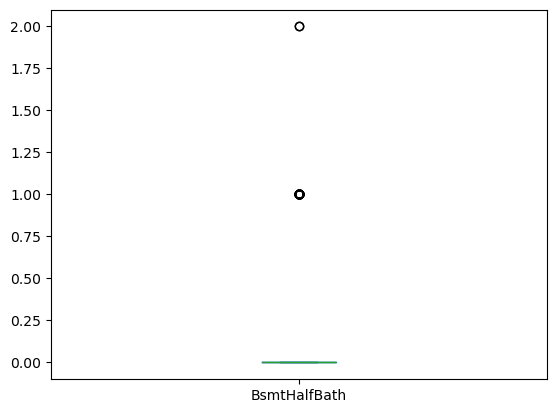

In [35]:
# Check unique values 
print(X_train['BsmtHalfBath'].unique())
# Simple visualisation of 'previous' column
X_train.BsmtHalfBath.plot(kind='box')

[221   0  96  91 244 126 164 108 150 148 216  60 218 156 272  20 143 129
 192 116 145 154 123 330 144 130 102 254 185  64 252 112 174  50 176  68
 236 214 138 228  99  80 128 293 386  37 115  48  67  40  84 114 226 275
  39 205 169 202 120  70 240 259 234 224  32  77 318 140  94 100 264 177
 160 200  19 280  81 210 137  30 189 168 180  52 184 552 190  36  34 134
 105 291 301 230 170  56  90 162 158  54 194  42 136 212  24 239]


<Axes: >

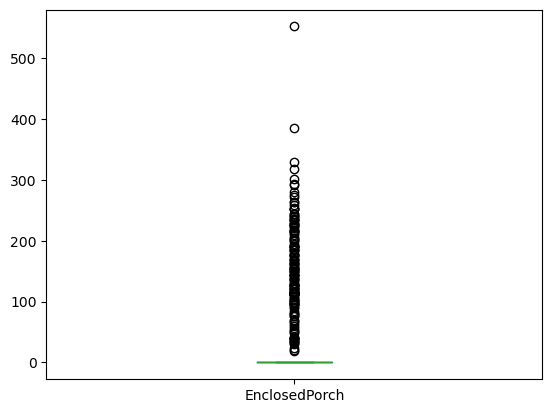

In [36]:
# Check unique values 
print(X_train['EnclosedPorch'].unique())
# Simple visualisation of 'previous' column
X_train.EnclosedPorch.plot(kind='box')

[  0 200 180 142 234 192 224  80 170 126 288 144 165 322 385 220 410 263
 182 122 176 204 259 160 197  60 260  95 161 145 266 130  99 120 210 252
 480 168 156 287 271 163 185 190 276 233  53 291 147 189  90 222 128 154
 119 198 374 265 178 440 116 140 216 175]


<Axes: >

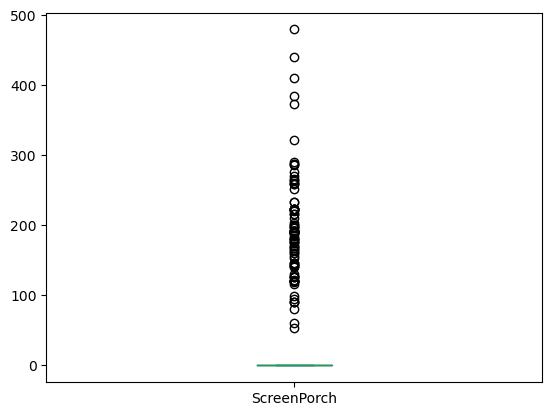

In [37]:
# Check unique values 
print(X_train['ScreenPorch'].unique())
# Simple visualisation of 'previous' column
X_train.ScreenPorch.plot(kind='box')

Meanwhile, the columns ['BsmtFinSF2', 'BsmtHalfBath', 'EnclosedPorch', and 'ScreenPorch'] **WILL NOT** be capped with `Winsorizer` since their variety are too small to be capped as seen in the visualizations above.  

They will be trimmed instead.

### Handling outlier with trimming method

In [38]:
# Define columns to be trimmed
Trim_normal_features_list = ['OverallQual', 'BedroomAbvGr', 'GarageArea']
Trim_skew_features_list = ['YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt']
Trim_extreme_skew_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'PoolArea', 'MiscVal', 'BsmtFinSF2', 'BsmtHalfBath', 'EnclosedPorch', 'ScreenPorch']

##### Trim the normal distribution features

In [39]:
def drop_normal_outliers(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()
    df.drop(df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)].index, inplace=True)

In [40]:
# Define columns to be trimmed
Trim_normal_features_list

print(f'Before trim: {X_train.shape}')

for i in Trim_normal_features_list:
    drop_normal_outliers(X_train,i)

print(f'After trim: {X_train.shape}') 

Before trim: (1168, 80)
After trim: (1150, 80)


##### Trim the moderately skewed distribution features

In [41]:
def drop_skew_outliers(df, variable,distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    df.drop(df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)].index,inplace=True)

In [42]:
# Define columns to be trimmed
Trim_skew_features_list

print(f'Before trim: {X_train.shape}')

for i in Trim_skew_features_list:
    drop_skew_outliers(X_train,i,1.5)

print(f'After trim: {X_train.shape}') 

Before trim: (1150, 80)
After trim: (1056, 80)


##### Trim the extremely skewed distribution features

In [43]:
def drop_extreme_skew_outliers(df, variable,distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    df.drop(df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)].index,inplace=True)

In [44]:
# Define columns to be trimmed
Trim_extreme_skew_features_list

print(f'Before trim: {X_train.shape}')

for i in Trim_skew_features_list:
    drop_extreme_skew_outliers(X_train,i,1.3)

print(f'After trim: {X_train.shape}') 

Before trim: (1056, 80)
After trim: (982, 80)


Set the same as index with y_train.

In [45]:
y_train = y_train.loc[X_train.index]

### Handling with capping method (`Winsorizer`)

In [46]:
# Capping features

winsoriser_value = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=['OverallCond'])

X_train_capped = winsoriser_value.fit_transform(X_train)

## c. Feature Selection

We are going to select features with the correlation phi-k matrix now.

In [47]:
# Concat features and target to check correlation
corr = pd.concat([X_train,y_train],axis=1)
corr.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [48]:
# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Check correlation
corr.phik_matrix()['SalePrice']

interval columns not set, guessing: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Id               0.000000
MSSubClass       0.411141
MSZoning         0.573959
LotFrontage      0.308190
LotArea          0.136937
Street           0.079486
Alley            0.101856
LotShape         0.287703
LandContour      0.261493
Utilities        0.000000
LotConfig        0.262764
LandSlope        0.127408
Neighborhood     0.687648
Condition1       0.140983
Condition2       0.159853
BldgType         0.260722
HouseStyle       0.314991
OverallQual      0.710637
OverallCond      0.356011
YearBuilt        0.611128
YearRemodAdd     0.548668
RoofStyle        0.147691
RoofMatl         0.000000
Exterior1st      0.392771
Exterior2nd      0.343407
MasVnrType       0.331393
MasVnrArea       0.387464
ExterQual        0.668092
ExterCond        0.201145
Foundation       0.575758
BsmtQual         0.622908
BsmtCond         0.326463
BsmtExposure     0.254370
BsmtFinType1     0.364771
BsmtFinSF1       0.523005
BsmtFinType2     0.000000
BsmtFinSF2       0.033218
BsmtUnfSF        0.298120
TotalBsmtSF 

Let's define the correlation with values under <0.5 to be removed.

In [49]:
# Filter variables with correlation coefficient <= 0.5
low_correlation_vars = [var for var, corr in corr.phik_matrix()['SalePrice'].items() if corr <= 0.5]

# Set display option to show all rows
pd.set_option('display.max_rows', None)

print(low_correlation_vars)

interval columns not set, guessing: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'Bs

In [50]:
# Drop unnecessary columns in X_train
X_train.drop(low_correlation_vars, axis=1, inplace=True)

# Drop unnecessary columns in X_test
X_test.drop(low_correlation_vars, axis=1, inplace=True)

print (X_train.columns)

Index(['MSZoning', 'Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'KitchenQual', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea'],
      dtype='object')


## d. Split Numerical and Categorical Columns

In [51]:
# Split num col & cat col
num_col = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

print(f'numerical: {num_col}')
print(f'categorical: {cat_col}')

numerical: ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
categorical: ['MSZoning', 'Neighborhood', 'ExterQual', 'Foundation', 'BsmtQual', 'HeatingQC', 'CentralAir', 'KitchenQual', 'GarageFinish']


Check which scaler to use:

In [52]:
# Create empty list to contain/add/fill (menyimpan) column lists
normal = []
skew = []
extreme = []
for i in num_col:
   
    if abs(round(X_train[i].skew(),3)) > 1: 
        extreme.append(i)
    elif abs(round(X_train[i].skew(),3)) > 0.5:
        skew.append(i)
    else:
        normal.append(i)

print(f'normal distribution: {normal}.')
print(f'skew distribution: {skew}.') 
print(f'extreme skew distribution:{extreme}.')

normal distribution: ['OverallQual', 'YearRemodAdd', 'TotalBsmtSF', 'FullBath', 'GarageArea'].
skew distribution: ['YearBuilt', 'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageCars'].
extreme skew distribution:[].


Since nothing belonged to the extreme skew distribution, every columns will be scaled with `StandardScaler()`

Now for the categorical columns, let's determine if they're ordinal or nominal.

In [69]:
# Limit row viewing as needed
pd.reset_option('display.max_rows')

# Detect categorical colums
X_train[X_train.select_dtypes(include=['object']).columns]

,MSZoning,Neighborhood,ExterQual,Foundation,BsmtQual,HeatingQC,CentralAir,KitchenQual,GarageFinish
1382,RM,Affordable,TA,BrkTil,Fa,Ex,Y,Gd,Unf
672,RL,High End,Gd,CBlock,Gd,TA,Y,TA,RFn
1038,RM,Affordable,TA,CBlock,TA,TA,Y,TA,Unf
83,RL,Affordable,TA,CBlock,TA,Gd,Y,TA,Unf
541,RL,High End,Gd,PConc,Gd,Ex,Y,Gd,Fin
...,...,...,...,...,...,...,...,...,...
1083,RL,Affordable,TA,CBlock,TA,TA,Y,TA,RFn
1340,RL,Affordable,TA,CBlock,TA,TA,Y,TA,Unf
1138,RL,Affordable,TA,PConc,TA,TA,Y,Gd,RFn
214,RL,High End,TA,CBlock,Gd,Ex,Y,TA,Fin


The ordinal data of the categorical data are ['ExterQual', 'HeatingQC', 'KitchenQual', 'BsmtQual']
Nominal data are: ['MSZoning', 'Neighborhood', 'Foundation', 'CentralAir', 'GarageFinish']

ExterQual, HeatingQC, KitchenQual are consisted of:
* Ex: Excellent
* Gd: Good
* TA: Average/Typical
* Fa: Fair
* Po: Poor  

BsmtQual: Evaluates the height of the basement


* Ex: Excellent (100+ inches)	
* Gd: Good (90-99 inches)
* TA: Typical (80-89 inches)
* Fa: Fair (70-79 inches)
* Po: Poor (<70 inches)
* NA: No Basement  



In [54]:
# Create categorical ordinal and nominal grouping
cat_col_ord = ['ExterQual', 'HeatingQC', 'KitchenQual', 'BsmtQual']
cat_col_nom = ['MSZoning', 'Neighborhood', 'Foundation', 'CentralAir', 'GarageFinish']

print(cat_col_ord)
print(cat_col_nom)

['ExterQual', 'HeatingQC', 'KitchenQual', 'BsmtQual']
['MSZoning', 'Neighborhood', 'Foundation', 'CentralAir', 'GarageFinish']


## e. Cardinality Check

In [55]:
# Count unique value for each categorical columns
for i in cat_col:
    print(f'{i} : {X_train[i].nunique()}')

MSZoning : 5
Neighborhood : 25
ExterQual : 4
Foundation : 5
BsmtQual : 4
HeatingQC : 5
CentralAir : 2
KitchenQual : 4
GarageFinish : 3


From these categorical columns, the column 'Neighborhood' has the highest cardinality because it has 25 unique values.

To reduce this cardinality, we will manually group the neighborhood by its median sale price, determining if its in an area that are:
* High-end - if the neighborhood sale price > median sale price
* Average - if the neighborhood sale price = median sale price
* Affordable - if the neighborhood sale price < median sale price


In [56]:
# Define grouping of neighborhood column with 
def group_neighborhood_by_sale_price(X_train, y_train, neighborhood_column):
    
    # Calculate the overall median sale price
    overall_median_price = y_train.median()
    
    # Group neighborhoods based on their median sale price compared to the overall median
    for neighborhood, group_data in X_train.groupby(neighborhood_column):
        median_price = y_train[X_train.index.isin(group_data.index)].median()
        if median_price > overall_median_price:
            grouping = 'High End'
        elif median_price < overall_median_price:
            grouping = 'Affordable'
        else:
            grouping = 'Average'
        X_train.loc[group_data.index, neighborhood_column] = grouping
    
    return X_train

# Call the function to group neighborhoods
X_train = group_neighborhood_by_sale_price(X_train, y_train, 'Neighborhood')

# Check the updated X_train DataFrame
(X_train.head())

,MSZoning,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,ExterQual,Foundation,BsmtQual,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,GarageYrBlt,GarageFinish,GarageCars,GarageArea
1382,RM,Affordable,7,1920,1950,TA,BrkTil,Fa,0,596,Ex,Y,998,764,1762,1,Gd,1989.0,Unf,2,576
672,RL,High End,6,1977,1977,Gd,CBlock,Gd,767,1208,TA,Y,1208,0,1208,1,TA,1977.0,RFn,2,546
1038,RM,Affordable,4,1970,2008,TA,CBlock,TA,0,546,TA,Y,798,546,1344,1,TA,1980.0,Unf,0,0
83,RL,Affordable,5,1960,1960,TA,CBlock,TA,0,1065,Gd,Y,1065,0,1065,1,TA,1974.0,Unf,2,461
541,RL,High End,8,2000,2000,Gd,PConc,Gd,0,969,Ex,Y,997,1288,2285,2,Gd,2000.0,Fin,3,648


So now the cardinality of the Neighborhood is split into 3 categories, the Affordable, Average, and High-End.  

Let's re-check the cardinality:

In [57]:
# Count unique value for each categorical columns
for i in cat_col:
    print(f'{i} : {X_train[i].nunique()}')

MSZoning : 5
Neighborhood : 2
ExterQual : 4
Foundation : 5
BsmtQual : 4
HeatingQC : 5
CentralAir : 2
KitchenQual : 4
GarageFinish : 3


Now the column 'Neighborhood' is reduced to 2 unique values. 

Everything is in low cardinality.

# vi. Model Definition

For predicting the house prices, I will use the `LinearRegression()` model first because it is a simple and interpretable model that can provide a good baseline for predicting house prices.   
It assumes a linear relationship between the independent variables (such as the features of the house) and the dependent variable (the house price). 

We are going to create a ColumnTransformer and also Pipeline for the `LinearRegression()` model.

In [58]:
# Define the transformers for Linear Regression Model
std_scaler = StandardScaler()
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ordinal_encoder = OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                             ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                             ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                             ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('std', std_scaler, num_col),
        ('onehot', onehot_encoder, cat_col_nom),
        ('ordinal', ordinal_encoder, cat_col_ord)
    ],
    remainder='passthrough'
)

# Create the Pipeline with preprocessor and LinearRegression estimator
pipeline_lin = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

The second model I will use is the `RandomForestRegressor()`.

Random Forest Regression is used as the second model because it is a more complex model that is based on ensemble learning, which can capture non-linear relationships and interactions between the features and the house price. 

Random forest regression is also often more robust to overfitting and can provide higher prediction accuracy compared to linear regression, especially when the relationship between the features and the house price is non-linear or complex.

We are also going to create a ColumnTransformer and also Pipeline for the `RandomForestRegressor()` model.

In [59]:
# Define the transformers for Random Forest Regression Model
std_scaler = StandardScaler()
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ordinal_encoder = OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                             ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                             ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
                                             ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])

# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('std', std_scaler, num_col),
        ('onehot', onehot_encoder, cat_col_nom),
        ('ordinal', ordinal_encoder, cat_col_ord)
    ],
    remainder='passthrough'
)

# Create the Pipeline with preprocessor and LinearRegression estimator
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# vii. Model Training 

### a. Model train for `LinearRegression()` model

In [60]:
# Fit the pipeline linear regression on the training data
pipeline_lin.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std', StandardScaler(),
                                                  ['OverallQual', 'YearBuilt',
                                                   'YearRemodAdd', 'BsmtFinSF1',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'GrLivArea',
                                                   'FullBath', 'GarageYrBlt',
                                                   'GarageCars',
                                                   'GarageArea']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['MSZoning', 'Neighborhood',
                                                   'Foundation', 'CentralAir',
                                                   'GarageFinish']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['NA',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex']]),
                                                  ['ExterQual', 'HeatingQC',
                                                   'KitchenQual',
                                                   'BsmtQual'])])),
                ('regressor', LinearRegression())])

### b. Model train for `RandomForestRegressor()` model

In [61]:
# Fit the pipeline random forest regressor on the training data
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std', StandardScaler(),
                                                  ['OverallQual', 'YearBuilt',
                                                   'YearRemodAdd', 'BsmtFinSF1',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'GrLivArea',
                                                   'FullBath', 'GarageYrBlt',
                                                   'GarageCars',
                                                   'GarageArea']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['MSZoning', 'Neighborhood',
                                                   'Foundation', 'CentralAir',
                                                   'GarageFinish']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex'],
                                                                             ['NA',
                                                                              'Po',
                                                                              'Fa',
                                                                              'TA',
                                                                              'Gd',
                                                                              'Ex']]),
                                                  ['ExterQual', 'HeatingQC',
                                                   'KitchenQual',
                                                   'BsmtQual'])])),
                ('regressor', RandomForestRegressor())])

# viii. Model Evaluation 

### a. Model evaluation for `LinearRegression()` model

In [62]:
# Predict on the train set
y_pred_train1 = pipeline_lin.predict(X_train)

# Predict on the test set
y_pred_test1 = pipeline_lin.predict(X_test)

For both of the models, I decide to use the Root Mean Squared Error (`RMSE`) as the metric for several reasons:

* RMSE is easy to interpret because it is in the same units as the target variable (e.g., dollars for house prices). This makes it intuitive to understand how much error the model is making in terms of the actual price of the house.

* With the 'squared' feature, RMSE is more sensitive to outliers and helps capture the impact of large prediction errors, which is particularly relevant for house price prediction where outliers (extremely expensive or cheap houses) may have significant implications

* RMSE is sensitive to both the bias and variance of the model, it provides a comprehensive evaluation of model performance. 

Given these reasons, RMSE would be a suitable metric for evaluating regression models predicting house prices. It provides a clear and interpretable measure of prediction accuracy.

In [63]:
# Calculate RMSE for train set
rmse_train1 = np.sqrt(mean_squared_error(y_train, y_pred_train1))

# Calculate RMSE for test set
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_pred_test1))

print(f'RMSE for train set using LinearRegression(): {rmse_train1}')
print(f'RMSE for test set using LinearRegression(): {rmse_test1}')

RMSE for train set using LinearRegression(): 21460.73732274989
RMSE for test set using LinearRegression(): 46757.585333263974


The RMSE for the train set is significantly lower than the RMSE for the test set. This suggests that the model is able to make more accurate predictions on the training data compared to the test data.

The large difference between the RMSE values for the train and test sets indicates that the model may be overfitting the training data. 

### b. Model evaluation for `RandomForestRegressor()` model

We are using RMSE for the similar reasons above for this second model.

In [64]:
# Predict on the train set
y_pred_train2 = pipeline_rf.predict(X_train)

# Predict on the test set
y_pred_test2 = pipeline_rf.predict(X_test)

In [65]:
# Calculate RMSE for training set
rmse_train2 = np.sqrt(mean_squared_error(y_train, y_pred_train2))

# Calculate RMSE for test set
rmse_test2 = np.sqrt(mean_squared_error(y_test, y_pred_test2))

print(f'RMSE for train set using RandomForestRegressor(): {rmse_train2}')
print(f'RMSE for test set using RandomForestRegressor(): {rmse_test2}')

RMSE for train set using RandomForestRegressor(): 7903.09814115189
RMSE for test set using RandomForestRegressor(): 36039.64621584509


The low RMSE on the training set (8240.41) shows that the model is capable of capturing complex relationships within the training data.

The higher RMSE on the test set (35927.69) indicates that while the model performs well on the data it has seen before, it struggles to generalize to new data. This is a sign of overfitting.

# ix. Model Saving for Inference Data

In [66]:
# Model Saving for LinearRegression()
with open('linear_regression_model.pkl', 'wb') as file_1: 
    pickle.dump(pipeline_lin, file_1)

In [67]:
# Model Saving for RandomForestRegressor()
with open('random_forest_regressor_model.pkl', 'wb') as file_2: 
    pickle.dump(pipeline_rf, file_2)

In [68]:
# Detect all originalcolumns to create new inference data (unseen data)
print(df_ori.columns)
print(df_ori.loc[10])

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# x. Conclusion

From both models we use which are `LinearRegression()` and `RandomForestRegressor()`, we can conclude that:

+ The RMSE for the train set is significantly lower for the random forest model (8240.41) compared to the linear regression model (21460.74). This suggests that the random forest model fits the training data better and captures the patterns more accurately.

* The RMSE for the test set is also lower for the random forest model (35927.69) compared to the linear regression model (46757.59). Although both models perform worse on the test set compared to the train set, the random forest model has a lower RMSE on the test set, implying better generalization to unseen data.

Overall, the random forest model outperforms the linear regression model in terms of RMSE for both the training and test sets. This indicates that the random forest model provides better predictions of house prices compared to the linear regression model, both on the data it was trained on and on new, unseen data.

Furthermore, both models show overfitting, but the linear regression model demonstrates a higher degree of overfitting compared to the random forest model. Overfitting can lead to poor generalization performance on new, unseen data and can affect the model's reliability in real-world applications. 

Therefore, to mitigate overfitting, improvements needed to be done such as regularization techniques, feature selection, or hyperparameter tuning, may be necessary to improve the models' capabilities and ensure more reliable predictions in the future.

To sum up, the random forest model's superior performance suggests that it may be a more reliable tool for predicting house prices, which can help real estate professionals, investors, and homeowners make more accurate pricing decisions. Additionally, the insights gained from comparing the performance of different models can guide future model development and refinement efforts to further improve predictive accuracy and business outcomes.